In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def load_image(path):
    return Image.open(path)

def show_images(images, titles, cmap=None):
    plt.figure(figsize=(20, 10))
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, len(images), i)
        plt.title(title)
        plt.imshow(image, cmap=cmap)
        plt.axis('off')
    plt.show()

def bit_plane_slicing(image, planes=[0, 1, 2, 3, 4, 5, 6, 7]):
    if image.mode == 'RGB':
        # Convert to grayscale for simplifying the bit slicing
        image = image.convert('L')
    image = np.array(image)
    slices = []
    titles = []
    for i in planes:
        # Generate masks for each bit plane
        mask = 1 << i
        sliced_image = np.bitwise_and(image, mask)
        sliced_image = np.where(sliced_image > 0, 255, 0)  # Enhance visibility
        slices.append(sliced_image)
        titles.append(f'Bit plane {i}')
    return slices, titles

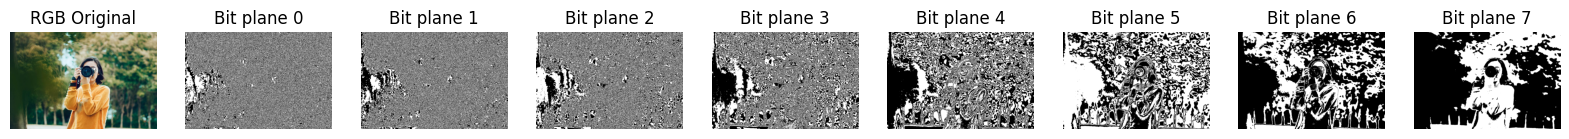

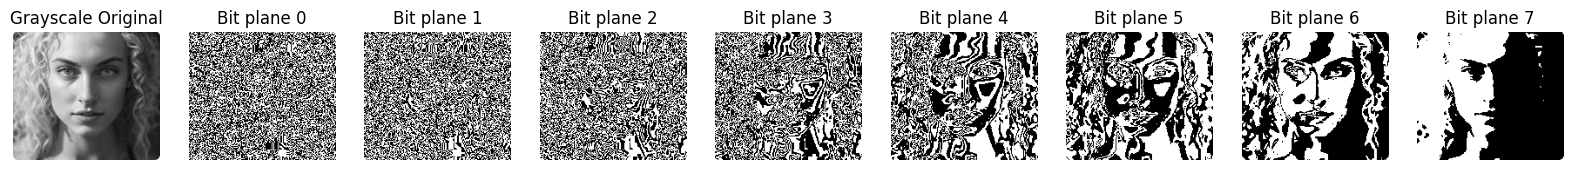

In [6]:

# Load an example image (You will need to replace 'path_to_image.jpg' with actual image path)
rgb_image = load_image('../images/rgb.jpg')
gray_image = load_image('../images/greyscale.jpeg').convert('L')  # Convert to grayscale if needed

# Process the images for bit plane slicing
rgb_slices, rgb_titles = bit_plane_slicing(rgb_image)
gray_slices, gray_titles = bit_plane_slicing(gray_image)

# Show the results
show_images([rgb_image] + rgb_slices, ['RGB Original'] + rgb_titles, cmap='gray')
show_images([gray_image] + gray_slices, ['Grayscale Original'] + gray_titles, cmap='gray')
